In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston

In [ ]:
data = pandas.read_csv('f:\\MLDataSet\\simple_regression_data.csv')

In [ ]:
data.sample(5)

In [ ]:
plt.scatter(data['Volume'],data['Price'])
plt.show()

In [ ]:
print(data['Volume'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
DF=scaler.transform(data)
print(DF)


In [ ]:
X=data['Volume'].values
X=np.array(X).reshape(-1,1)
Y=data['Price'].values
#print(X)

In [ ]:
xtrain,ytrain,xtest,ytest=train_test_split(X,Y,test_size=0.50)

In [ ]:
#print(xtrain)

In [ ]:
regr=LinearRegression()

In [ ]:
regr.fit(xtrain,ytrain)


In [ ]:
print(ytest)

In [ ]:
xtest=np.array(xtest).reshape(-1,1)
Ypred=regr.predict(xtest)
print(Ypred)

In [ ]:
print(regr.intercept_)
print(regr.coef_)


In [ ]:
print(regr.score(xtrain,ytrain))

In [ ]:
print("Mean squared error: %.1f" % mean_squared_error(ytest,Ypred))

In [ ]:
print('R2 Score: %.2f' % r2_score(ytest,Ypred))

In [ ]:
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,ytest,color='red',linewidth=2)
plt.show()

# Multiple Regression
In this task we will use Boston housing data and perform multiple regression. This dataset are part of StatLib Library maintained at Carnegie Mellon University. It is created by Harrison, D. and Rubinfeld, D.L.,J. Environ. This dataset contains 13 continuous attribute and one binary class attribute. Total 506 instances are present.

Scikit learn contains this dataset by default. We will use that.

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()

In [ ]:
#boston_data is a dictionary. First check the keys
boston.keys()

In [ ]:
print(boston.values())

In [ ]:
boston.feature_names

In [ ]:
import pandas as pd
DF=pd.DataFrame(boston.data,columns=boston.feature_names)

In [ ]:
DF.head()

In [ ]:
DF['price']=boston.target
DF.head()

In [ ]:
#First check for missing information.
DF.isnull().sum()

In [ ]:
bostonX=DF[DF.columns[0:13]]
bostonY=DF[DF.columns[13:14]]


In [ ]:
bostonX.head()

In [ ]:
bostonX.corr()

In [ ]:
#Visualize correlation between attributes using heatmap
import seaborn
seaborn.heatmap(bostonX.corr())

In [ ]:
#darker shades of the chart represent higher values than the lighter shade.
#feature variables as row headers and column headers, and the variable vs itself
#on the diagonal— is extremely powerful way to visualize relationships between variables 
#in high dimensional space.

#Feature contains high correlation. 
#We need to remove them first before apply regression techniques.

bostonX_corr=bostonX.corr().abs()
print(bostonX_corr)

In [ ]:
# Select upper triangle of matrix
UPPER = bostonX_corr.where(numpy.triu(numpy.ones(bostonX_corr.shape), k=1).astype(numpy.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in UPPER.columns if any(UPPER[column] > 0.75)]

#Print correlated_features
print(correlated_features)

In [ ]:
#Drop features
bostonX = bostonX.drop(correlated_features, axis=1)

In [ ]:
#Divide the data into training and test set. train set contains 80% of the data. test set contains 20% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bostonX, bostonY, test_size=0.20)

In [ ]:
#Create object of multiple linear regression
linear_regression = LinearRegression()

In [ ]:
#Fit the model
linear_regression.fit(X_train,Y_train)

In [ ]:
#Make prediction on test data
Y_pred = linear_regression.predict(X_test)

In [ ]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

In [ ]:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred))

In [ ]:
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test,Y_pred))

In [ ]:
# Compare actual value and predicted value
Y_test['Pred'] = Y_pred
Y_test['Difference'] = abs(Y_test['Pred'] - Y_test['price'])
Y_test.head()

In [ ]:
# We can calculate error using K fold cross validation
kfold = KFold(len(DF),n_folds=10,shuffle=True)
mean_abs_errors = list()
for train,test in kfold:
    linear_regression.fit(bostonX.ix[train],bostonY.ix[train])
    Y_test = bostonY.ix[test]
    Y_pred = linear_regression.predict(bostonX.ix[test])
    mean_abs_errors.append(mean_absolute_error(Y_test,Y_pred))
print('10 Fold Cross validation Error',numpy.mean(mean_abs_errors))

# Polynomial Regression

In [ ]:
https://www.askpython.com/python/examples/polynomial-regression-in-python#:~:text=%20A%20Simple%20Example%20of%20Polynomial%20Regression%20in,a%20Polynomial%20Regression%20Model.%20We%20will...%20More%20

Polynomial regression also a type of linear regression is often used to make predictions using polynomial powers of the independent variables. You can understand this concept better using the equation shown below:

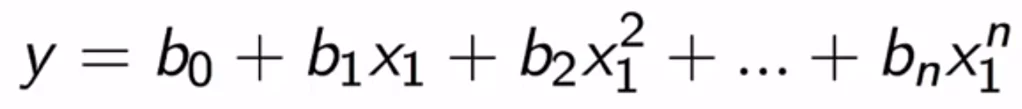

Polynomial regression also a type of linear regression is often used to make predictions using polynomial powers of the independent variables. You can understand this concept better using the equation shown below:

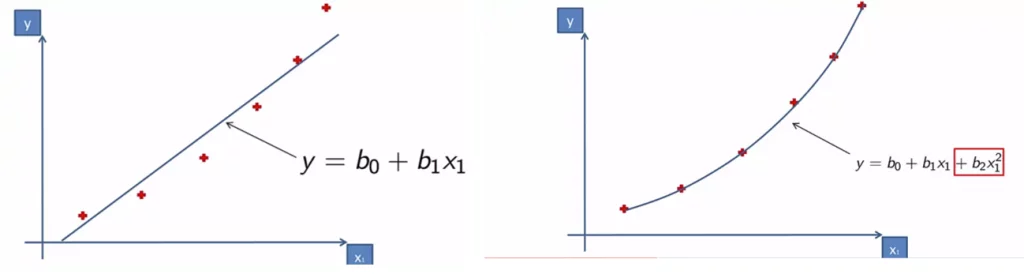

#### Why is Polynomial regression called Linear?
Polynomial regression is sometimes called polynomial linear regression. Why so?

Even though it has huge powers, it is still called linear. This is because when we talk about linear, we don’t look at it from the point of view of the x-variable. We talk about coefficients.

Y is a function of X. Can this function be expressed as a linear combination of coefficients because ultimately used to plugin X and predict Y.

Hence, by just looking at the equation from the coefficients point of view, makes it linear. Interesting right?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
dataset = pd.read_csv('d://MLDataSet//Position.csv')
dataset

In [ ]:
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values

Since we have only 10 observations, we will not segregate into the test and training set. This is for 2 reasons:

Small observations won’t make sense because we don’t have enough information to train on one set and test the model on the other.
We want to make a very accurate prediction. We need more information on the train set. Hence the whole dataset is used only for training.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

In [ ]:
plt.scatter(X,y, color='red')
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Fitting a Polynomial Regression Model
We will be importing PolynomialFeatures class. poly_reg is a transformer tool that transforms the matrix of features X into a new matrix of features X_poly. It contains x1, x1^2,……, x1^n.

degree parameter specifies the degree of polynomial features in X_poly. We consider the default value ie 2.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

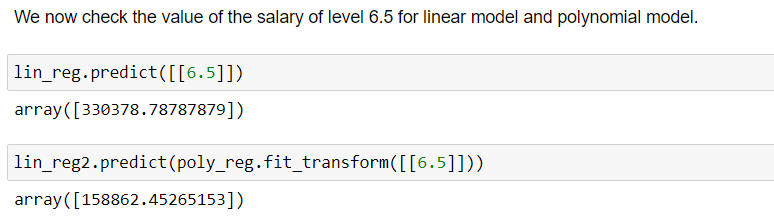

# Multiple,Ridge & lasso Regression

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [ ]:
# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 

In [ ]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(boston_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 
  
plt.show() 

The above code produce scatter plots of different independent variable with target variable 
We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization.

In [ ]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
print(boston_pd.head()) 

Now, we apply train-test split to divide the dataset into two parts, one for training and another for testing. We will be using 25% of the data for testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( 
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],  
    test_size = 0.25) 
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

#### Multiple (Linear) Regression

In [ ]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

In [ ]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables.

# Ridge Regression:
Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization.

In [ ]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

As we can observe from the above plots that \alpha helps in regularizing the coefficient and make them converge faster.
Notice that the above graphs can be misleading in a way that it shows some of the coefficients become zero. In Ridge Regularization, the coefficients can never be 0, they are just too small to observe in above plots.
 

# Lasso Regression:
Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.

In [ ]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# Multioutput regression (multilevel)

Multioutput Regression: Predict two or more numeric outputs given an input.

n multioutput regression, typically the outputs are dependent upon the input and upon each other. This means that often the outputs are not independent of each other and may require a model that predicts both outputs together or each output contingent upon the other outputs.

In [ ]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
X, y = load_linnerud(return_X_y=True)
clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
clf.predict(X[[0]])


In [ ]:
y

In [ ]:

fit(X, y[, sample_weight])

Fit the model to data.

get_params([deep])

Get parameters for this estimator.

partial_fit(X, y[, sample_weight])

Incrementally fit the model to data.

predict(X)

Predict multi-output variable using a model

score(X, y[, sample_weight])

Return the coefficient of determination R^2 of the prediction.

# Regression Plots with Seaborn
The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships

Seaborn is not only a visualization library but also a provider of built-in datasets. Here, we will be working with one of such datasets in seaborn named ‘tips’. The tips dataset contains information about the people who probably had food at the restaurant and whether or not they left a tip. It also provides information about the gender of the people, whether they smoke, day, time and so on.

In [ ]:
# import the library
import seaborn as sns
  
# load the dataset
dataset = sns.load_dataset('tips')
  
# the first five entries of the dataset
dataset.head()

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='total_bill', y ='tip', data = dataset)

Explanation
x and y parameters are specified to provide values for the x and y axes. sns.set_style() is used to have a grid in the background instead of a default white background. The data parameter is used to specify the source of information for drawing the plots.

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='total_bill', y ='tip', data = dataset, 
           hue ='sex', markers =['o', 'v'])

Explanation
In order to have a better analysis capability using these plots, we can specify hue to have a categorical separation in our plot as well as use markers that come from the matplotlib marker symbols. Since we have two separate categories we need to pass in a list of symbols while specifying the marker.

# Displaying multiple plots

In [ ]:
sns.lmplot(x ='total_bill', y ='tip', data = dataset, 
           col ='sex', row ='time', hue ='smoker')

Explanation
In the above code, we draw multiple plots by specifying a separation with the help of the rows and columns. Each row contains the plots of tips vs the total bill for the different times specified in the dataset. Each column contains the plots of tips vs the total bill for the different genders. A further separation is done by specifying the hue parameter on the basis of whether the person smokes.

Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

# Residuals
A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.
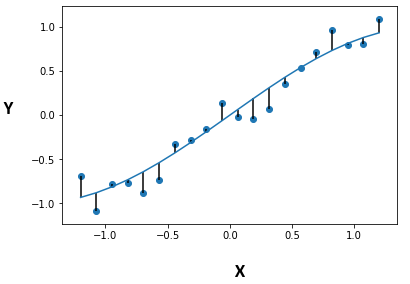

Residual Plots
A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis
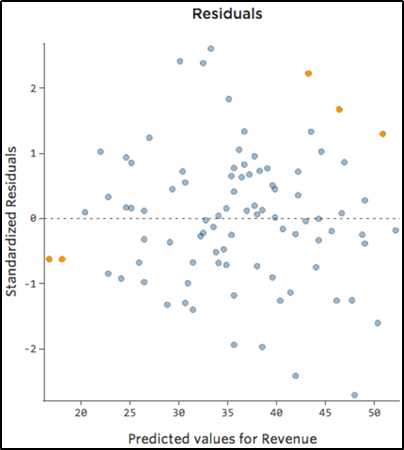

### Residual Plot Analysis
The most important assumption of a linear regression model is that the errors are independent and normally distributed.Let’s examine what this assumption means.

Every regression model inherently has some degree of error since you can never predict something 100% accurately. More importantly, randomness and unpredictability are always a part of the regression model. Hence, a regression model can be explained as:

#### Response=Deterministic+Stochastic

The deterministic part of the model is what we try to capture using the regression model. Ideally, our linear equation model should accurately capture the predictive information. Essentially, what this means is that if we capture all of the predictive information, all that is left behind (residuals) should be completely random & unpredictable i.e stochastic. Hence, we want our residuals to follow a normal distribution. And that is exactly what we look for in a residual plot. So what are the characteristics of a good & bad residual plot?

Characteristics of Good Residual Plots
A few characteristics of a good residual plot are as follows:
-It has a high density of points close to the origin and a low density of points away from the origin
-It is symmetric about the origin

we project all the residuals onto the y-axis. As seen in Figure, we end up with a normally distributed curve; satisfying the assumption of the normality of the residuals.
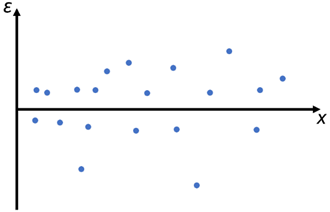


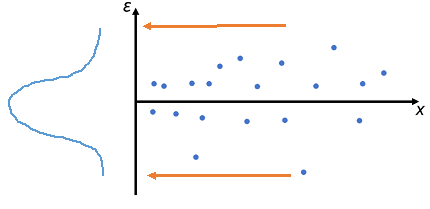

one other reason this is a good residual plot is, that independent of the value of an independent variable (x-axis), the residual errors are approximately distributed in the same manner. In other words, we do not see any patterns in the value of the residuals as we move along the x-axis.
Hence, this satisfies our earlier assumption that regression model residuals are independent and normally distributed.

# seaborn.residplot() :
This method is used to plot the residuals of linear regression. This method will regress y on x and then draw a scatter plot of the residuals. You can optionally fit a lowess smoother to the residual plot, which can help in determining if there is a structure to the residuals.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
# loading dataset
data = sns.load_dataset("tips")
  
# draw residplot
sns.residplot(x = "total_bill",
              y = "tip",
              data = data)
  
# show the plot
plt.show()
  

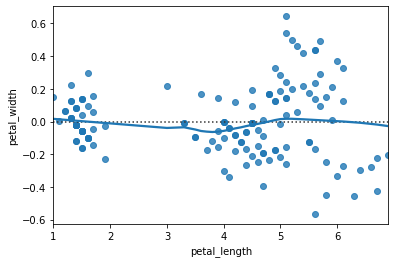

In [1]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt
  
# loading dataset
data = sns.load_dataset("iris")
  
# draw residplot
# with lowess = True
sns.residplot(x = "petal_length",
              y = "petal_width",
              data = data,
              lowess = True)
  
# show the plot
plt.show()

####  Outliers: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

#### Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

#### Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

# Poisson Regression

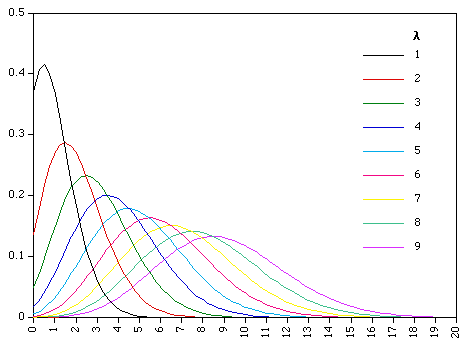

Poisson regression is similar to the usual Multiple Linear Regression except the fact that the target variable is in the form of count data that follows the Poisson distribution.
Count Data: Count the number of occurrences in a specified unit of time, distance or area.
Examples :
1. Predict the number of units sold of a product on a particular day.
2. Predict the number of bike crossings over the bridge.
3. Predict the number of sixes in a cricket match.

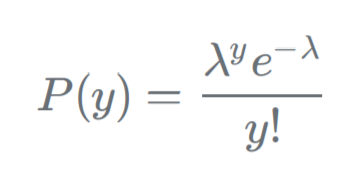

λ: Variance of y.
y: Discrete positive random variable.

In [2]:
from sklearn.linear_model import PoissonRegressor
pr = PoissonRegressor()


In [4]:
pr.fit(X,y)
y_pr = pr.predict(x)
print(y_pr)

NameError: name 'X' is not defined

In [ ]:
https://realpython.com/linear-regression-in-python/

In [ ]:
https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/